In [2]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

In [3]:
mnist = fetch_mldata('MNIST original')

In [4]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
mnist.COL_NAMES

['label', 'data']

In [6]:
mnist.get('data') # or mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [8]:
mnist.items()

dict_items([('DESCR', 'mldata.org dataset: mnist-original'), ('COL_NAMES', ['label', 'data']), ('target', array([0., 0., 0., ..., 9., 9., 9.])), ('data', array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))])

In [9]:
mnist.target.shape

(70000,)

In [10]:
mnist.data.shape

(70000, 784)

In [12]:
from sklearn.model_selection import train_test_split
train_image, test_image, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=0.3)

In [13]:
train_label.shape

(49000,)

In [14]:
scaler = StandardScaler()

In [15]:
# fit on training set
scaler.fit(train_image)

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
train_image = scaler.transform(train_image)
test_image = scaler.transform(test_image)

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
pca = PCA(.95)

In [20]:
transformed_data = pca.fit_transform(train_image)

In [21]:
pca.n_components_

324

The idea with going from 784 components to 324 is to reduce the running time of a supervised learning algorithm (in this case logistic regression).

In [22]:
approximation = pca.inverse_transform(transformed_data)
# Transform data back to its original space.

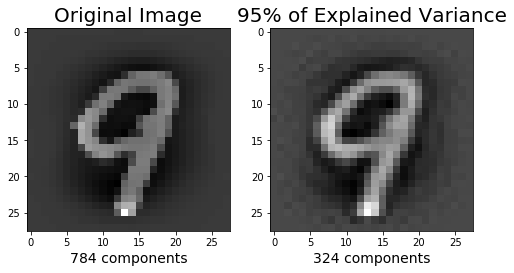

In [25]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_image[3].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest');
          
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 332 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[3].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('324 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [26]:
pca.n_components_

324

In [27]:
total = sum(pca.explained_variance_)
total

673.7395303753235

In [28]:
var_exp = [(i/total)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(len(var_exp))
print(var_exp[:10])

324
[6.0172283737216805, 4.3096164595584385, 3.990375511731127, 3.0763880171059275, 2.7069244814921216, 2.3409246936691623, 2.0285045053915893, 1.8520482659678765, 1.6296600498021379, 1.4882846499910798]


In [29]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

Plot can help understand the level of redundancy present in multiple dimensions.

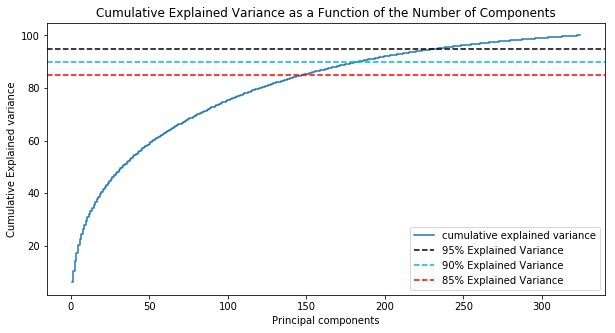

In [31]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 325), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

Just some more visualization.

In [32]:
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

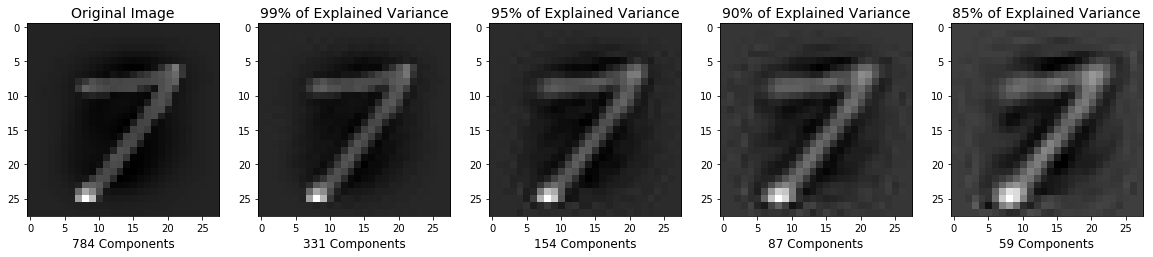

In [34]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(train_image[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, train_image)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, train_image)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, train_image)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, train_image)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

In [39]:
pca.get_covariance()[:3, :3]

array([[ 7.66846507e-02,  5.20561820e-33, -1.93814709e-33],
       [ 5.20561820e-33,  7.66846507e-02, -1.40867614e-31],
       [-1.93814709e-33, -1.40867614e-31,  7.66846507e-02]])

Applying Logistic regression to transformed data

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg = LogisticRegression(solver='lbfgs')

In [51]:
logreg.fit(train_image, train_label)

array([0.])

In [52]:
logreg.predict(test_image[0].reshape(1,-1))

array([0.])

In [53]:
logreg.score(test_image,test_label)

0.9142380952380952